<a href="https://colab.research.google.com/github/Varmai/ML_Portfolio_Project/blob/main/Portfolio_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# The MIT License 
Copyright

Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated documentation files (the "Software"), to deal in the Software without restriction, including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit persons to whom the Software is furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE.

# Question: Why are we doing this prediction
The reason for doing this analysis is to predict whether the employee stays with the current company or else leave it. When it comes to hiring, companies hire the best people who seems right fit for the given role. Even then the employee attrition is one thing that keeps employeers in peril as it's difficult to find another great fit for the position & also it's costly as well as time consuming. We have 34 various features that helps us to find on what causes the employee to leave the company.

In my own experience of being an employee at amazon, employees are willing to put in their best efforts & work hard if they're properly recognised and paid well enough.

So, we have features likes Job Satisfaction, hourly rate, Environment satisfaction etc. Let's dive into details & visualise during EDA.

#Data set:
https://www.kaggle.com/code/yoojink/employee-attrition-analysis-eda-and-modeling/data

About data

Education 1 'Below College' 2 'College' 3 'Bachelor' 4 'Master' 5 'Doctor'

EnvironmentSatisfaction 1 'Low' 2 'Medium' 3 'High' 4 'Very High'

JobInvolvement 1 'Low' 2 'Medium' 3 'High' 4 'Very High'

JobSatisfaction 1 'Low' 2 'Medium' 3 'High' 4 'Very High'

PerformanceRating 1 'Low' 2 'Good' 3 'Excellent' 4 'Outstanding'

RelationshipSatisfaction 1 'Low' 2 'Medium' 3 'High' 4 'Very High'

WorkLifeBalance 1 'Bad' 2 'Good' 3 'Better' 4 'Best'

Importing python libraries required to read our dataset. Drive has been mounted so that we don't need to upload the dataset every often whenever we pause & continue work after a while.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import drive
drive.mount('/content/drive')
path = "/content/drive/MyDrive/HR Employee Attrition.csv"
df = pd.read_csv(path)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


* Vizualizing the features(columns) from the dataset & understanding the fields that are required for output variable 'Attrition'

In [ ]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

Looking deep into the rows of every column to check how many unique & null values each feature have for better understanding

In [ ]:
tabel = pd.DataFrame({
    'Unique':df.nunique(),
    'Null':df.isnull().sum(),
    'NullPercent':df.isnull().sum() / len(df),
    'NaNN':df.isna().sum(),
    'Type':df.dtypes.values
})
tabel

,Unique,Null,NullPercent,NaNN,Type
Age,43,0,0.0,0,int64
Attrition,2,0,0.0,0,object
BusinessTravel,3,0,0.0,0,object
DailyRate,886,0,0.0,0,int64
Department,3,0,0.0,0,object
DistanceFromHome,29,0,0.0,0,int64
Education,5,0,0.0,0,int64
EducationField,6,0,0.0,0,object
EmployeeCount,1,0,0.0,0,int64
EmployeeNumber,1470,0,0.0,0,int64


* From the above table we can see that some features like 'Employeecount', 'Over18' has same value. So, it's better to drop those columns as the probability & distribution will be affected which leads to overfitting of data & inaccurate prediction.

In [ ]:
# Dropping features which are unnecessary churn for prediction

new_df = df.drop(columns = ['EmployeeCount', 'Over18', 'StandardHours', 'EmployeeNumber'])
new_df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,...,3,1,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,...,4,4,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,...,3,2,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,...,3,3,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,...,3,4,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,3,Male,...,3,3,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,4,Male,...,3,1,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,2,Male,...,4,2,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,4,Male,...,3,4,0,17,3,2,9,6,0,8


* From the above table, after dropping some columns we can see that columns like 'Department', "EducationField' & so one are categorical features and the values are in string variables. We need to convert these strings to int values so that mathematical functions & regressional analysis can be performed. Before that let's explore the data with EDA.

# Exploratory Data Analysis

When it comes to attrition we have to keep in mind some common factors that most likely to contribute for employee attrition like Job fields, Educationalfield, Gender, Age, Maritial status, Education provides some insights on what our data is exactly speaking.

* Now let's explore the important features & check who are more likely to leave their jobs


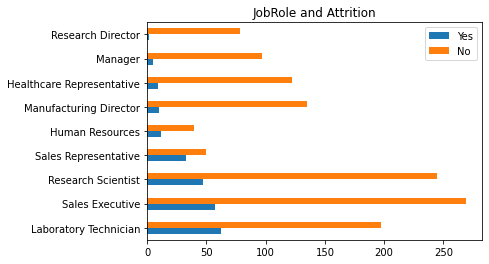

In [ ]:
n_df = pd.DataFrame()

n_df['Yes'] = df[df['Attrition'] == 'Yes']['JobRole'].value_counts()
n_df['No'] = df[df['Attrition'] == 'No']['JobRole'].value_counts()

n_df.plot.barh(title = 'JobRole and Attrition')

* From above we can see that 'Laboratory Technician', 'Sales Executive', 'Research Scientist' are more likely to leave their jobs compared to other fields.

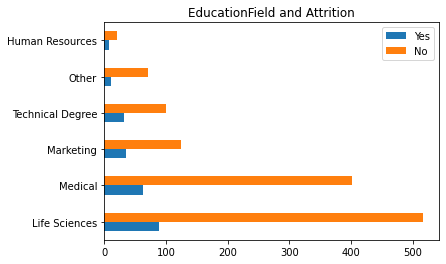

In [ ]:
n_df = pd.DataFrame()

n_df['Yes'] = df[df['Attrition'] == 'Yes']['EducationField'].value_counts()
n_df['No'] = df[df['Attrition'] == 'No']['EducationField'].value_counts()

n_df.plot.barh(title = 'EducationField and Attrition')

* Employees from Life Sciences & Medical background are more in dataset, so the attrition rates are in these fields as well which is obvious.

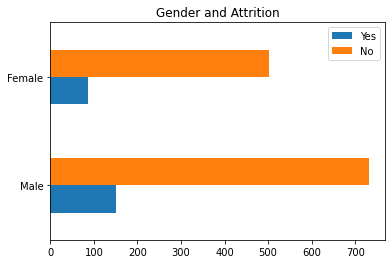

In [ ]:
n_df = pd.DataFrame()

n_df['Yes'] = df[df['Attrition'] == 'Yes']['Gender'].value_counts()
n_df['No'] = df[df['Attrition'] == 'No']['Gender'].value_counts()

n_df.plot.barh(title = 'Gender and Attrition')

* Men are more likely to leave the jobs compared to women

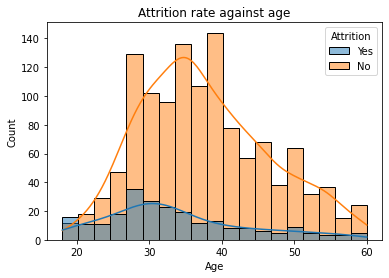

In [ ]:
import seaborn as sns

sns.histplot(data=df,x='Age',hue='Attrition',kde=True)
plt.title(label='Attrition rate against age')
plt.show()

* Age bracket between 25-35 are more likely to leave the jobs.

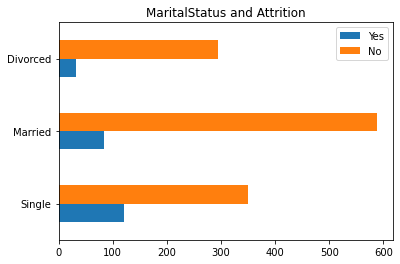

In [ ]:
n_df = pd.DataFrame()

n_df['Yes'] = df[df['Attrition'] == 'Yes']['MaritalStatus'].value_counts()
n_df['No'] = df[df['Attrition'] == 'No']['MaritalStatus'].value_counts()

n_df.plot.barh(title = 'MaritalStatus and Attrition')

* Single men are more likely to leave the job which is intresting to know from above plot

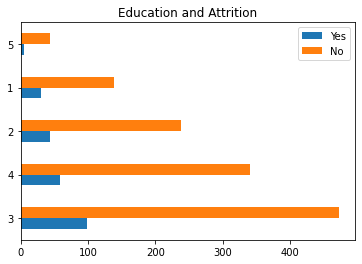

In [ ]:
n_df = pd.DataFrame()

n_df['Yes'] = df[df['Attrition'] == 'Yes']['Education'].value_counts()
n_df['No'] = df[df['Attrition'] == 'No']['Education'].value_counts()

n_df.plot.barh(title = 'Education and Attrition')

Education

1 'Below College'

2 'College'

3 'Bachelor'

4 'Master'

5 'Doctor'

Most of the people have atleast bachelor's degree or higher.

# Bivariate Analysis

* In our dataset there're two types of features:

* i) Numerical (Int type) 

* ii) Categorial (object type)

# Visualising Numerical features

In [ ]:
numeric_columns = [column for column in new_df.columns if new_df[column].dtype == 'int64']
print(numeric_columns)

['Age', 'DailyRate', 'DistanceFromHome', 'Education', 'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction', 'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']


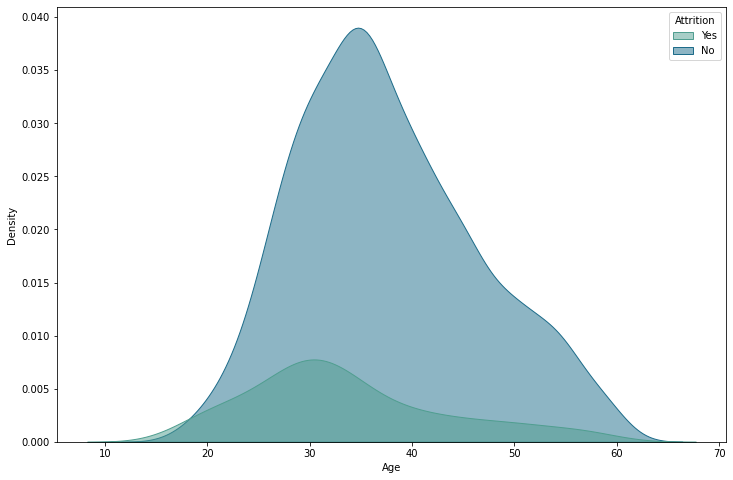

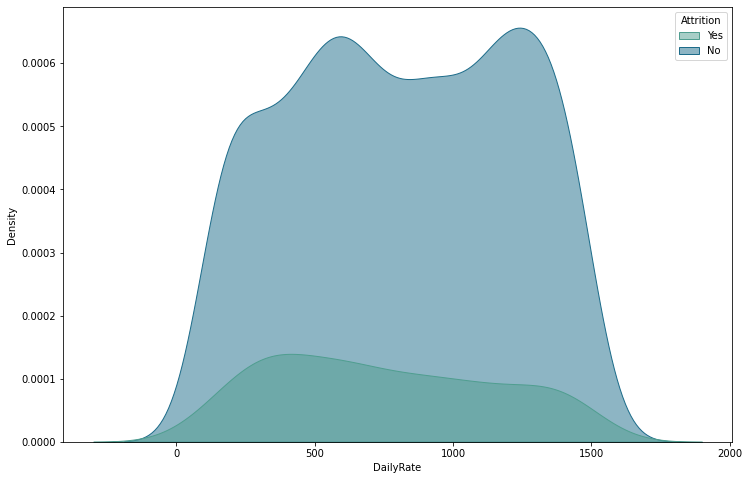

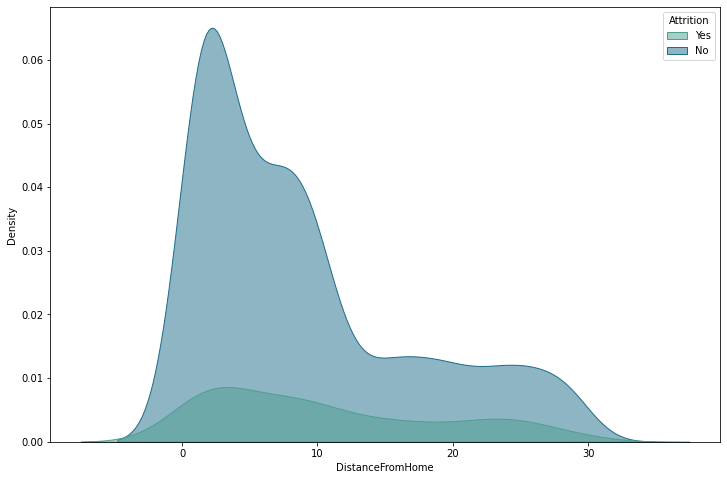

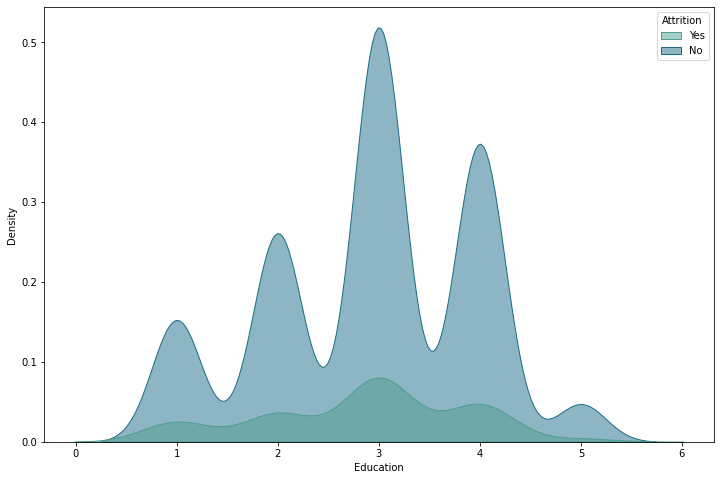

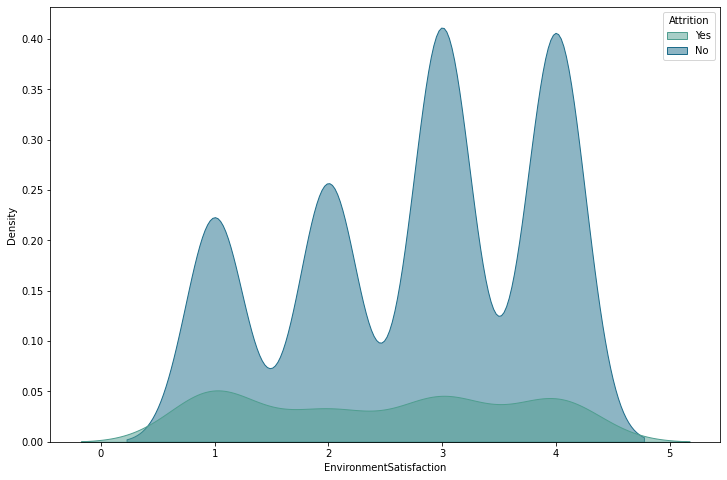

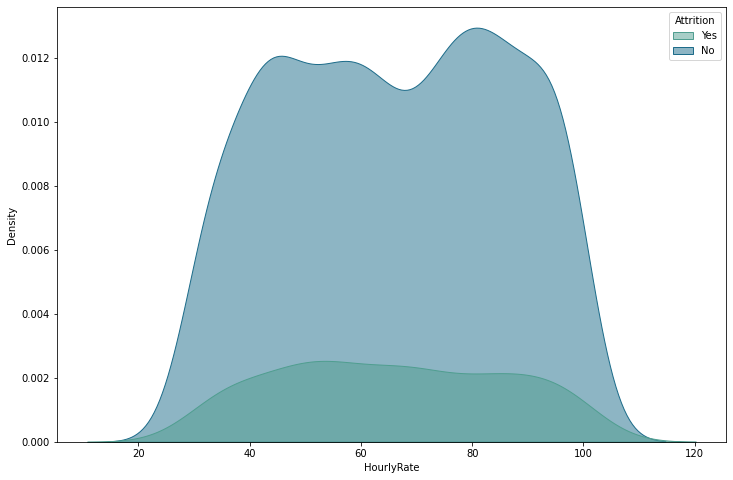

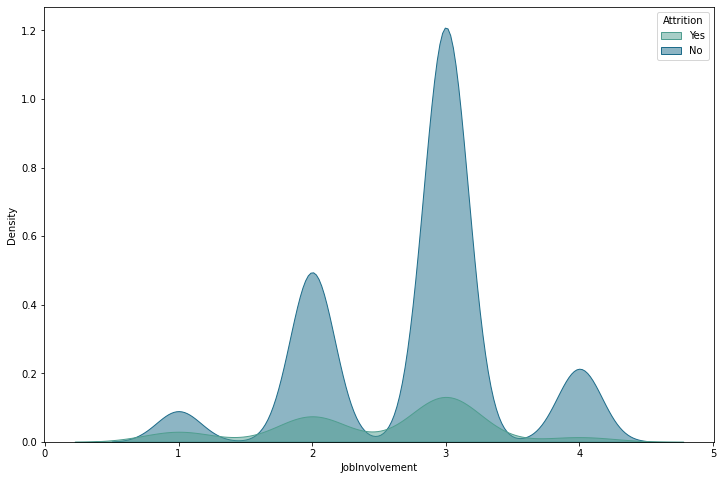

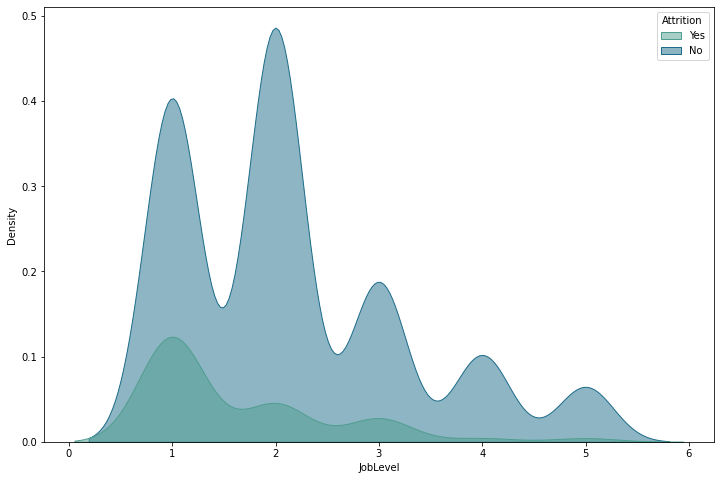

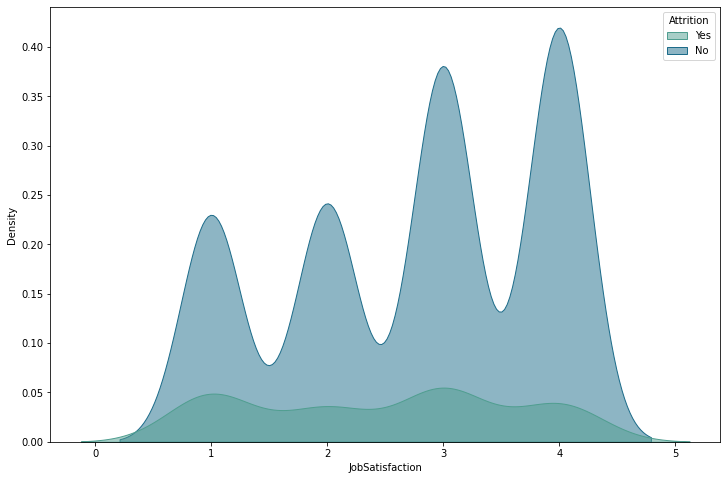

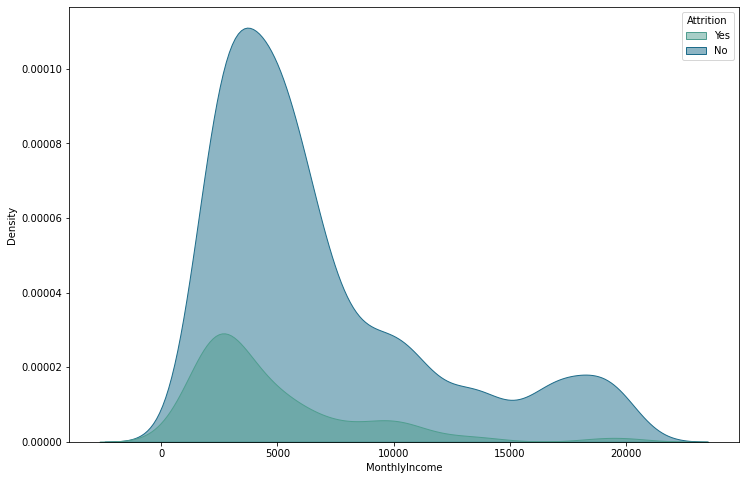

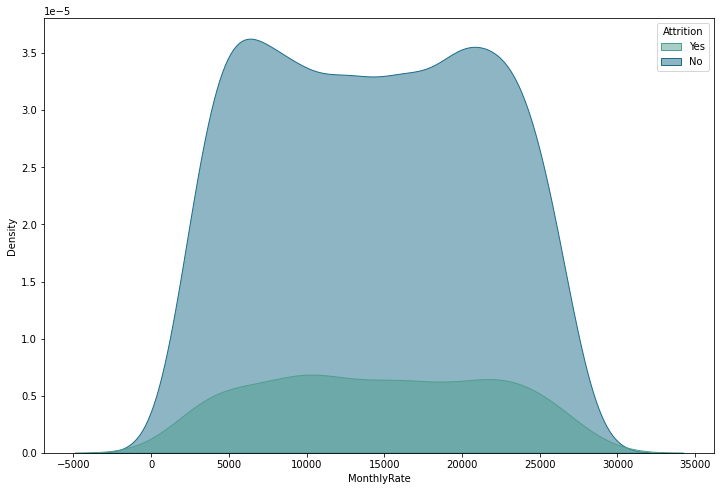

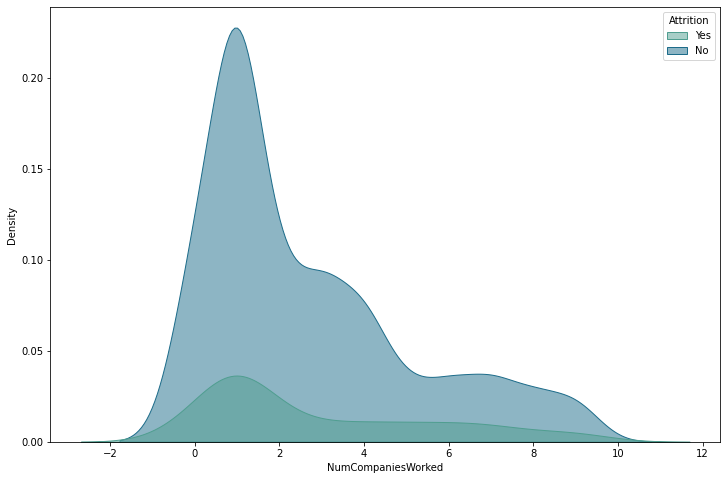

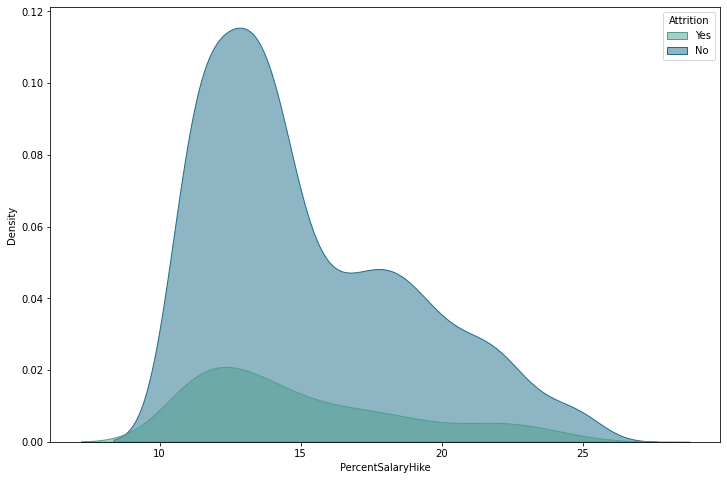

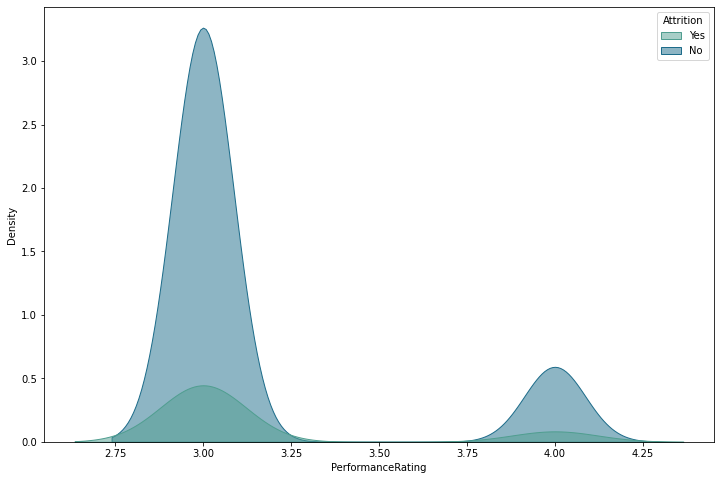

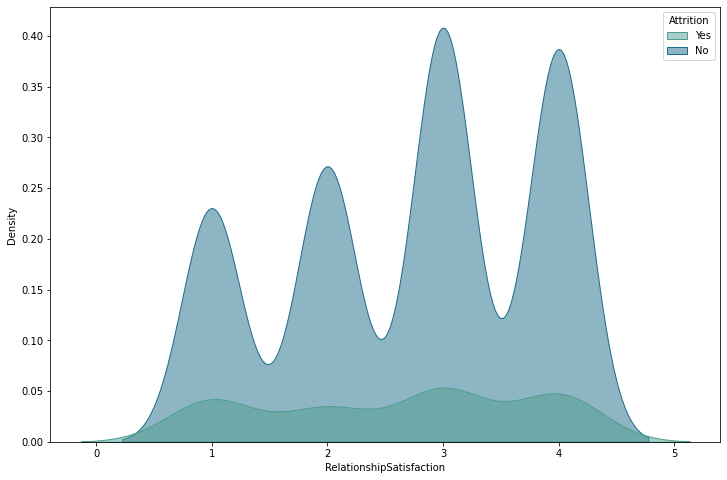

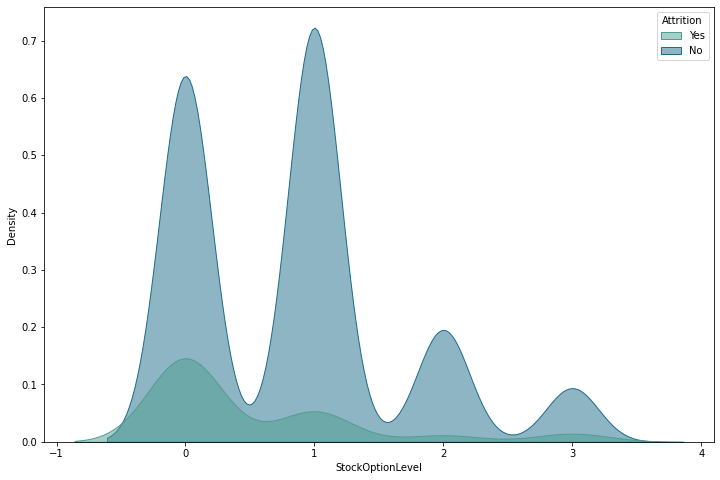

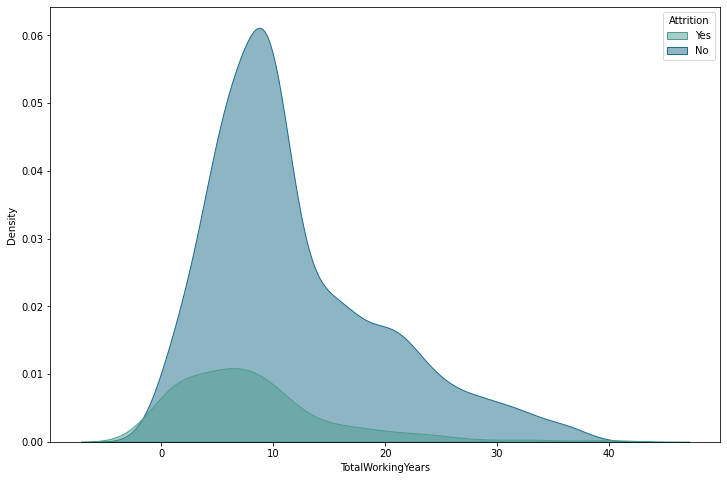

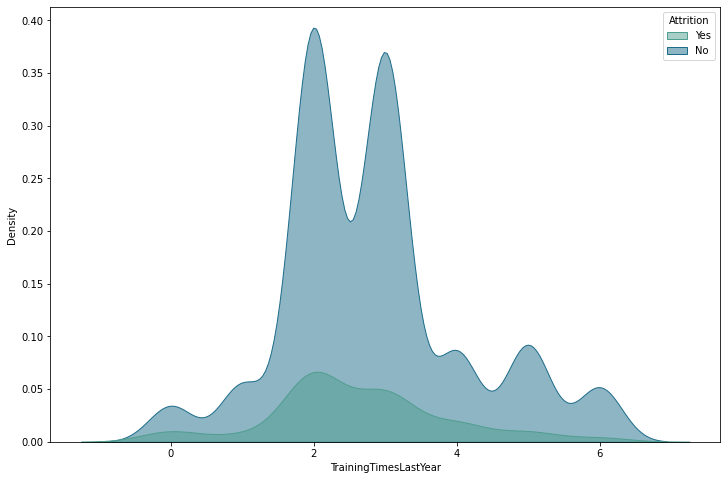

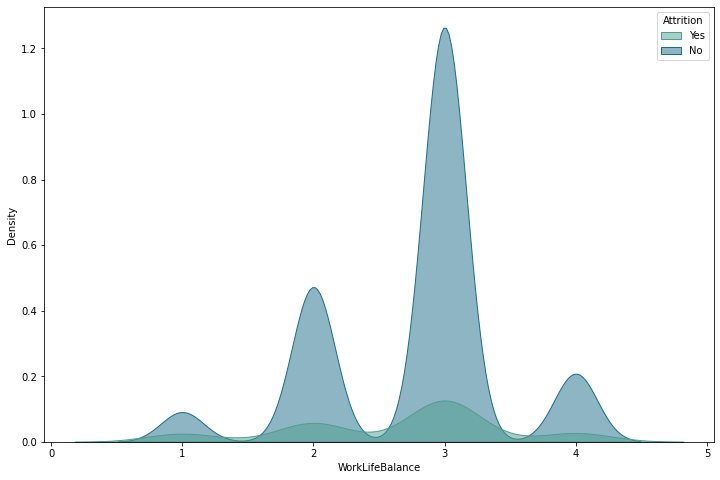

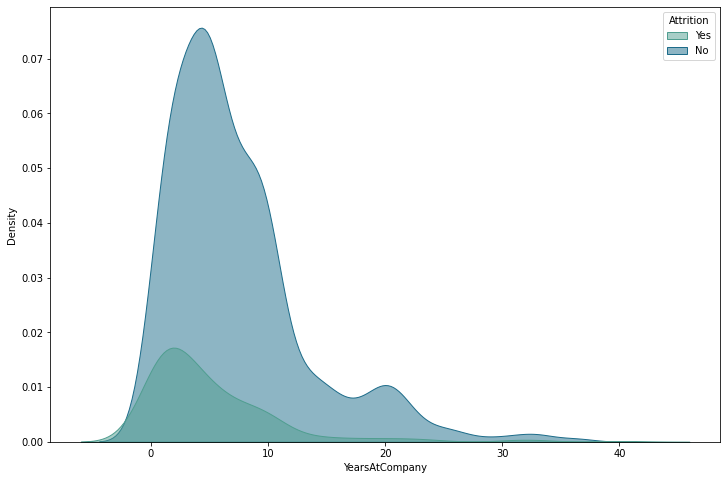

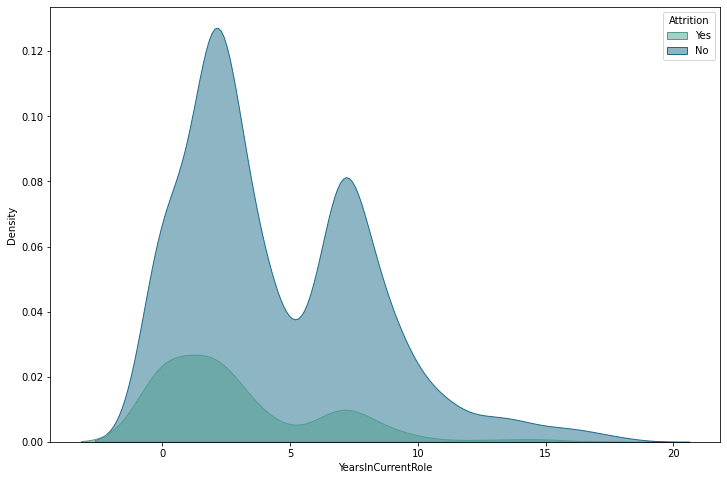

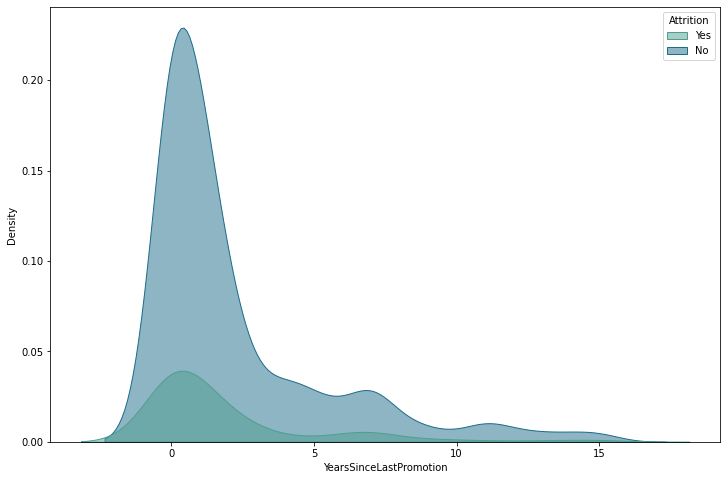

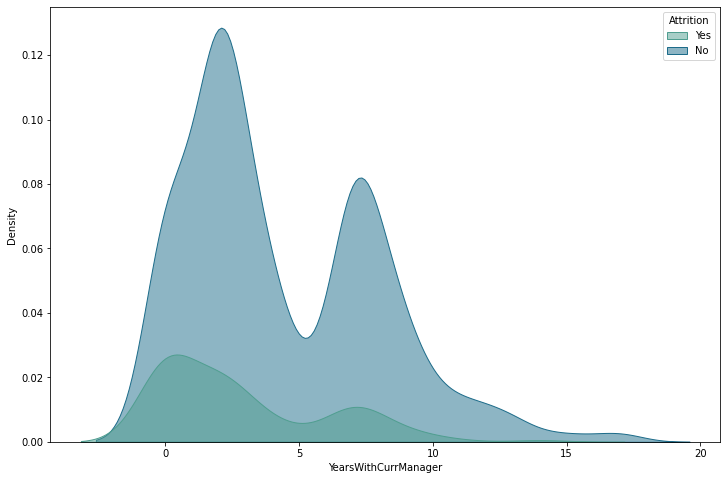

In [ ]:

for column in numeric_columns:
    plt.figure(figsize=(12,8))
    sns.kdeplot(data=new_df, x=column, hue="Attrition", fill=True, alpha=.5, palette="crest")
    plt.show()

Summary points:
* It's interesting to explore that employees whose distance to office less than 10miles are more likely to leave
* Employees with joblevel 1 or entry level people are likely to switch job
* People with Monthly Income less than 5000 bucks are more likely to leave
* If number of companies previously worked is less than 2 they it's more likely the employee will leave their current job
* If Percent Salary Hike is between 10-15 % employee is more likely to leave
* If StockOptionLevel is 0 then the employee is more likely to leave
* If number of years is less than 5 then there's high chance of employee leaving the job

# Visualising Categorical features

In [ ]:
categorical_columns = [column for column in new_df.columns if new_df[column].dtype != 'int64']
print(categorical_columns)

['Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus', 'OverTime']


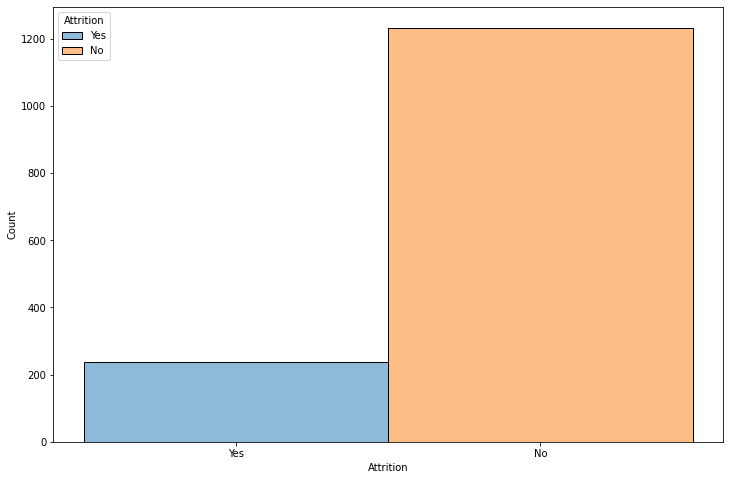

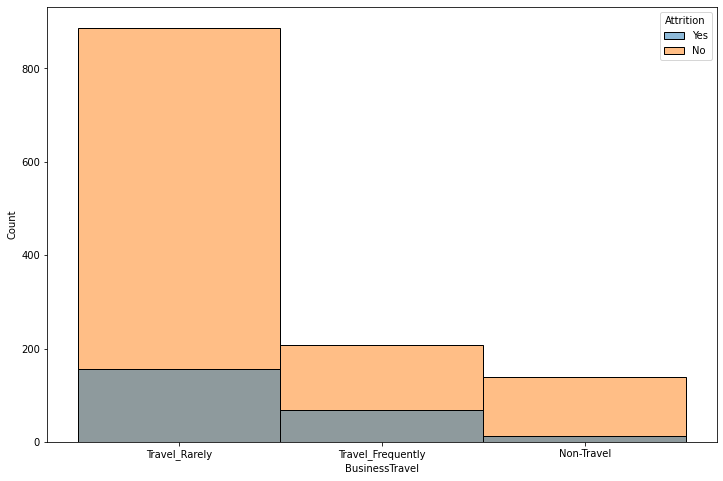

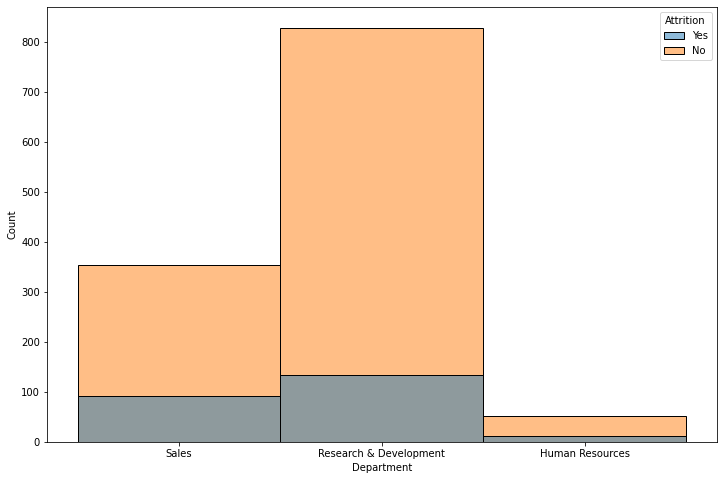

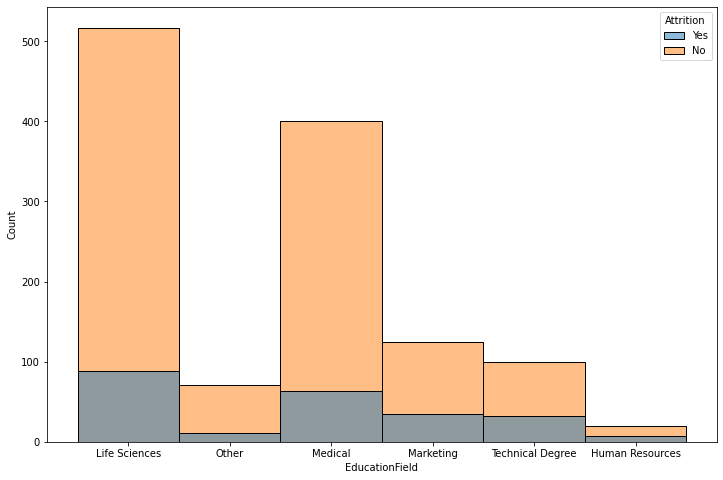

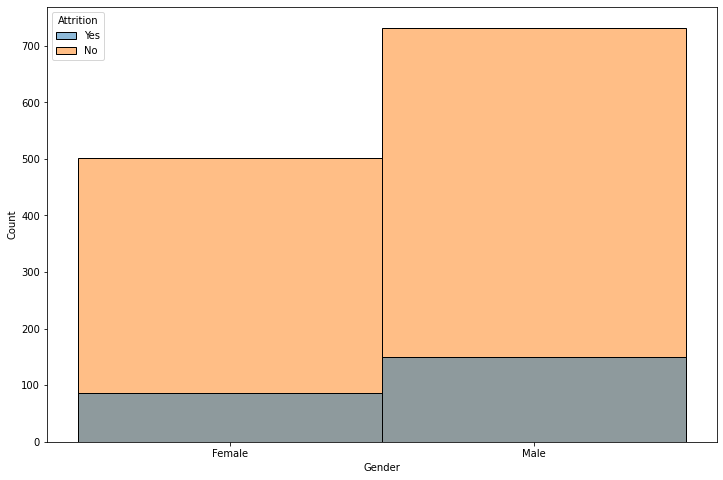

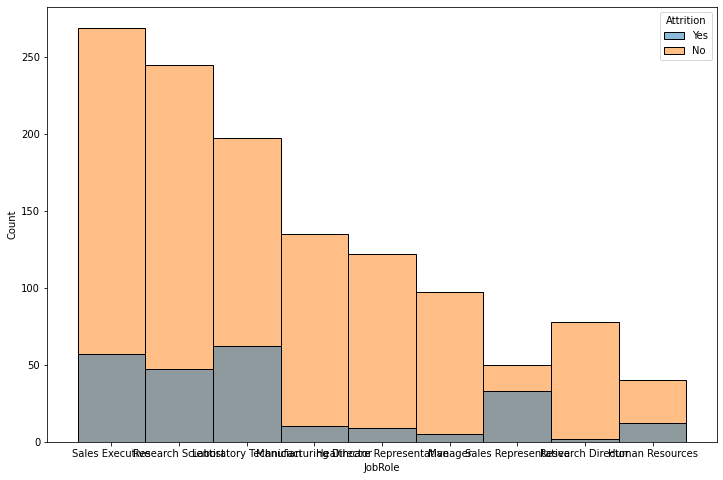

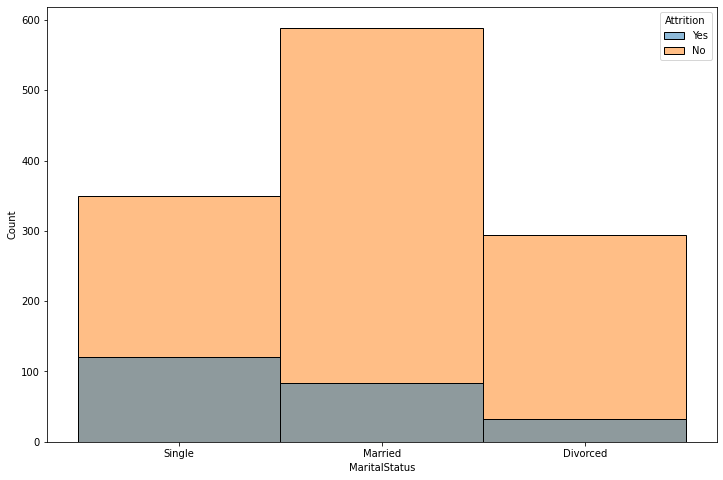

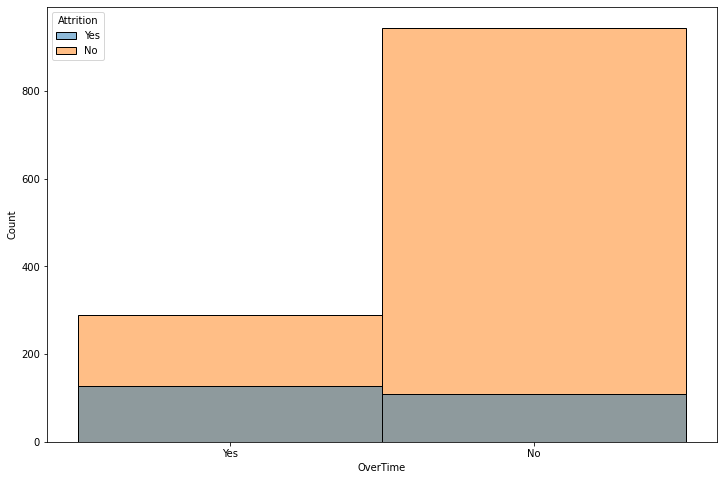

In [42]:
for column in categorical_columns:
    plt.figure(figsize=(12,8))
    sns.histplot(data=df,x=column,hue='Attrition')
    plt.show()

# Correlation Matrix

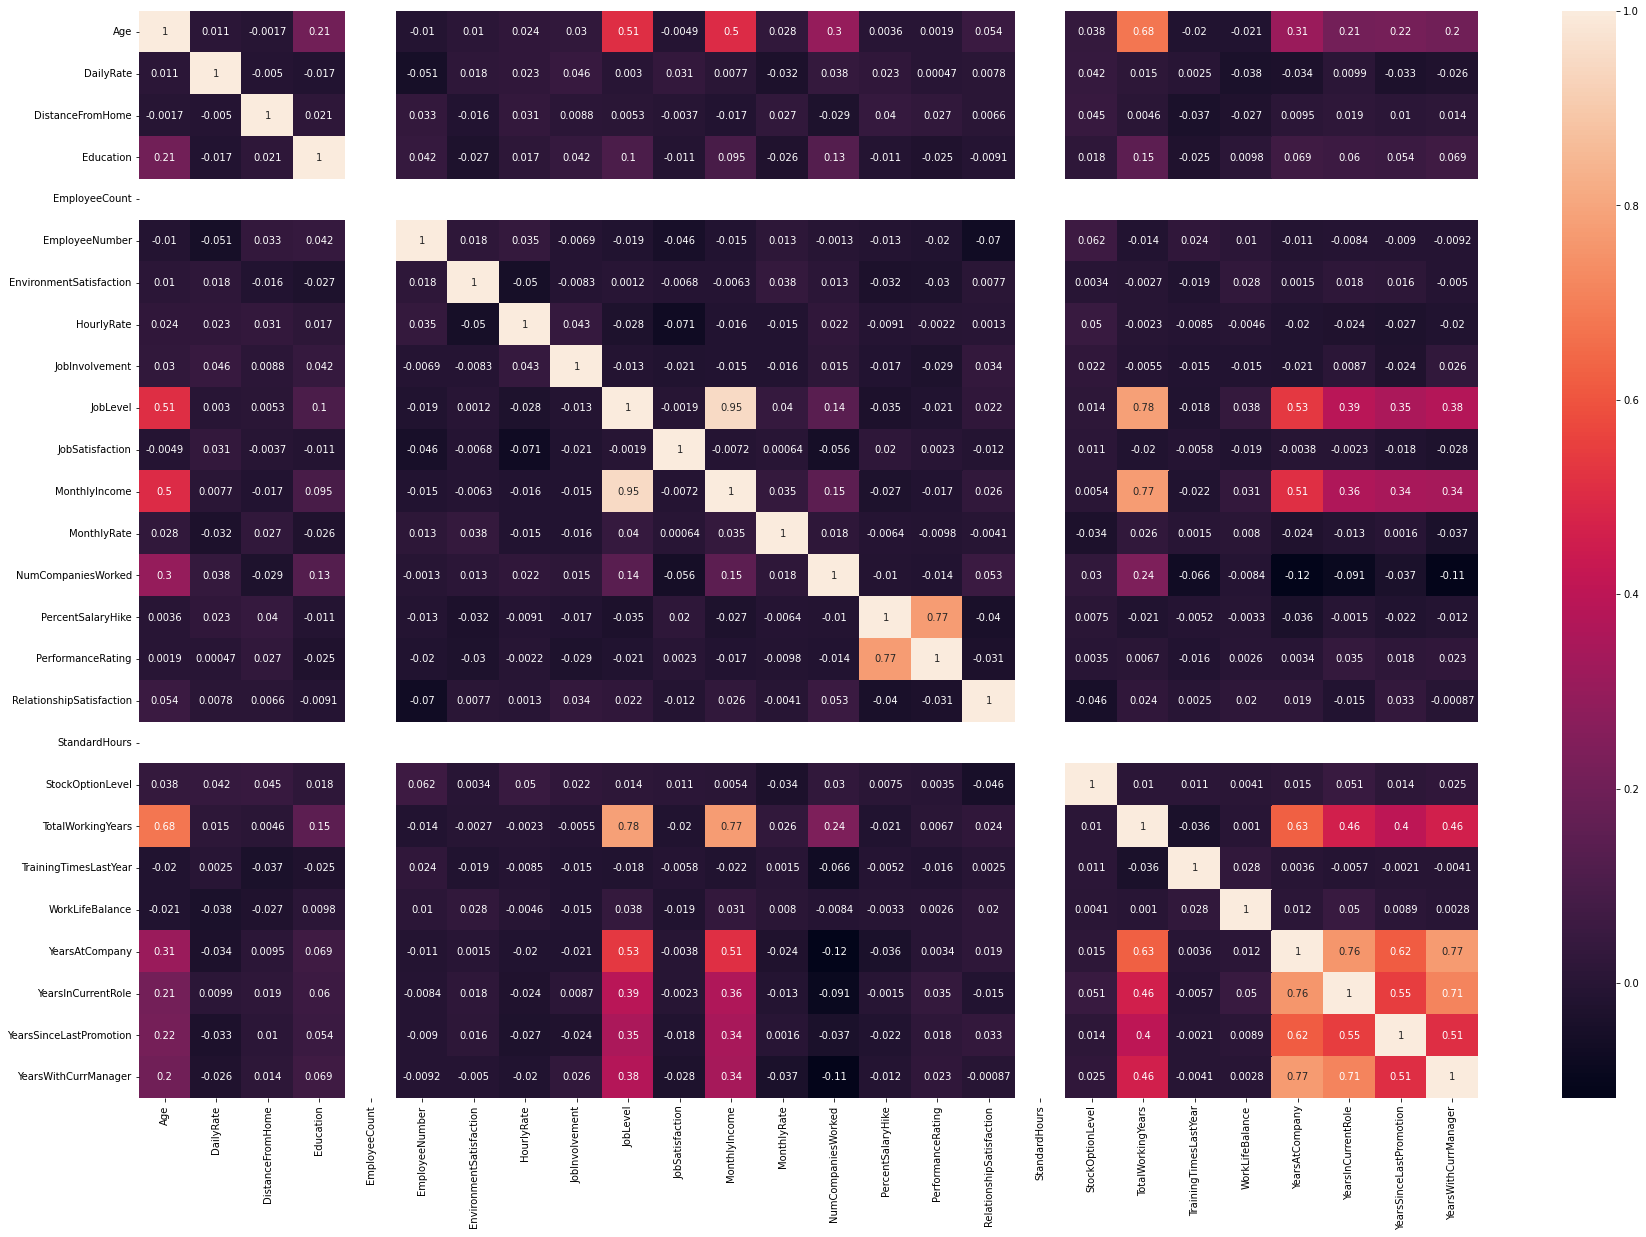

In [43]:
plt.subplots(figsize=(30,20))
sns.heatmap(df.corr(), annot=True)
plt.show()

There will be correlation between features in someway but to remove overfitting we should eliminate highly correlated features. Let's keep our correlation threshold to 80% & remove the features with more than 80% correlation.

* From the heatmap we can see that 'JobLevel', 'MonthlyIncome' are highly correlated at 95%. So, let's drop one of the feature.

In [44]:
new_df = new_df.drop(columns='JobLevel')

In [45]:
new_df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,...,3,1,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,...,4,4,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,...,3,2,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,...,3,3,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,...,3,4,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,3,Male,...,3,3,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,4,Male,...,3,1,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,2,Male,...,4,2,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,4,Male,...,3,4,0,17,3,2,9,6,0,8


* Out of 35 columns 5 features has been removed finally with our Exploratoty Data Analysis

# Converting data types

In [46]:
# Converting categorical features dtype to int dtype to perform regressions & numerical functions

from sklearn.preprocessing import LabelEncoder

for column in new_df.columns:
    fields = []
    if new_df[column].dtype == 'object':
        encoder = LabelEncoder()
        new_df[column] = encoder.fit_transform(new_df[column].values)

In [47]:
new_df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,2,1102,2,1,2,1,2,0,...,3,1,0,8,0,1,6,4,0,5
1,49,0,1,279,1,8,1,1,3,1,...,4,4,1,10,3,3,10,7,1,7
2,37,1,2,1373,1,2,2,4,4,1,...,3,2,0,7,3,3,0,0,0,0
3,33,0,1,1392,1,3,4,1,4,0,...,3,3,0,8,3,3,8,7,3,0
4,27,0,2,591,1,2,1,3,1,1,...,3,4,1,6,3,3,2,2,2,2


# Train Test Split

In [102]:
from sklearn.model_selection import train_test_split
x_df = new_df.drop(columns=['Attrition'])
X = x_df
y = new_df['Attrition']
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state= 42, test_size=0.3)

Before implementing any model let's 1st check with lazy predict on which models it's suggesting and also has better accuracy. 

In [96]:
!pip install lazypredict

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [148]:
import lazypredict
from lazypredict.Supervised import LazyClassifier
clf = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None, classifiers = 'all')
models,predictions = clf.fit(X_train, X_test, y_train, y_test)

print(models.sort_values('Accuracy', ascending=False))

100%|██████████| 29/29 [00:02<00:00, 11.75it/s]

                               Accuracy  Balanced Accuracy  ROC AUC  F1 Score  \
Model                                                                           
SVC                                0.88               0.56     0.56      0.84   
RidgeClassifierCV                  0.88               0.56     0.56      0.84   
RidgeClassifier                    0.88               0.56     0.56      0.84   
LGBMClassifier                     0.88               0.60     0.60      0.85   
XGBClassifier                      0.87               0.61     0.61      0.85   
ExtraTreesClassifier               0.87               0.55     0.55      0.82   
RandomForestClassifier             0.87               0.55     0.55      0.83   
CalibratedClassifierCV             0.87               0.58     0.58      0.84   
BaggingClassifier                  0.87               0.59     0.59      0.84   
KNeighborsClassifier               0.87               0.54     0.54      0.82   
LinearDiscriminantAnalysis  

# Visualising model wise accuracy

In [215]:
import plotly.express as px

models.sort_values(by = 'Accuracy',inplace = True,ascending = False)
line = px.line(data_frame= models ,y =["Accuracy"] , markers = True)
line.update_xaxes(title="Model",
              rangeslider_visible = False)
line.update_yaxes(title = "Accuracy")
line.update_traces(line_color="red")
line.update_layout(showlegend = True,
    title = {
        'text': 'Accuracy vs Model for Attrtion Predict with Classifier'})

line.show()

# Ridge Regression

Accuracy: 87.75510204081633
              precision    recall  f1-score   support

           0       1.00      0.88      0.93       432
           1       0.13      0.89      0.23         9

    accuracy                           0.88       441
   macro avg       0.56      0.88      0.58       441
weighted avg       0.98      0.88      0.92       441



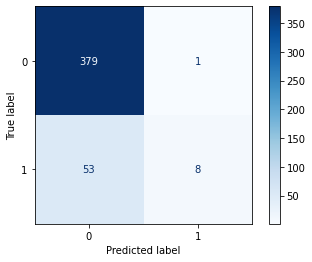

In [206]:
import sklearn.metrics as metrics
from sklearn.metrics import accuracy_score 
from sklearn.linear_model import RidgeClassifier

ridge_reg_model = RidgeClassifier()
ridge_reg_model.fit(X_train, y_train)
ridge_reg_model = ridge_reg_model.predict(X_test)
accuracy_score(y_test, ridge_reg_model)*100

print("Accuracy:", metrics.accuracy_score(ridge_reg_model,y_test)*100)
print(metrics.classification_report(ridge_reg_model, y_test))
ConfusionMatrixDisplay.from_predictions(y_test, ridge_reg_model, cmap = 'Blues')

The confusion matrix is to visualise the accuracy calculated in more detailed way.

Accuracy is calculated as follows:

Accuracy = TP+TN/(TP+FP+FN+TN)

TP = True Positive

TN = True Negative

FP = False Positive

FN = False Negative

In the above matrix TP = 8, TN = 379, FP = 1, FN = 53

The accuracy of a model will be more if FP & FN numbers are low. As low as 0 can give a perfect 100% accuracy but which is impossible in the real world data

# Logistic regression

Accuracy: 85.71428571428571
              precision    recall  f1-score   support

           0       0.99      0.86      0.92       437
           1       0.02      0.25      0.03         4

    accuracy                           0.86       441
   macro avg       0.50      0.56      0.48       441
weighted avg       0.98      0.86      0.91       441



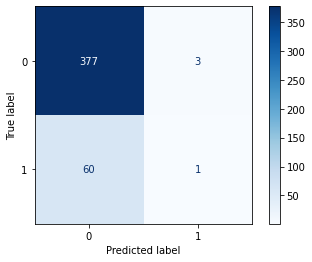

In [207]:
from sklearn.linear_model import LogisticRegression

log_reg_model = LogisticRegression()
log_reg_model.fit(X_train, y_train)
log_reg_pred = log_reg_model.predict(X_test)
accuracy_score(y_test, log_reg_pred)*100

print("Accuracy:", metrics.accuracy_score(log_reg_pred,y_test)*100)
print(metrics.classification_report(log_reg_pred, y_test))
ConfusionMatrixDisplay.from_predictions(y_test, log_reg_pred, cmap = 'Blues')

# XGBoost

Accuracy: 88.20861678004536
              precision    recall  f1-score   support

           0       0.97      0.90      0.93       410
           1       0.33      0.65      0.43        31

    accuracy                           0.88       441
   macro avg       0.65      0.77      0.68       441
weighted avg       0.93      0.88      0.90       441



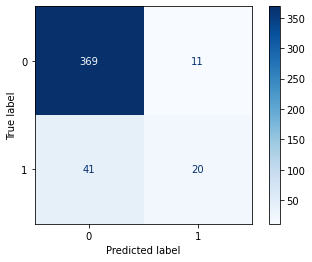

In [208]:
from xgboost import XGBClassifier

xgb = XGBClassifier(n_estimators=200)
xgb.fit(X_train, y_train)
xgb_pred = xgb.predict(X_test)
xgb.fit(X_train, y_train)

print("Accuracy:", metrics.accuracy_score(xgb_pred,y_test)*100)
print(metrics.classification_report(xgb_pred, y_test))
ConfusionMatrixDisplay.from_predictions(y_test, xgb_pred, cmap = 'Blues')

# Random Forest

Accuracy: 86.39455782312925
              precision    recall  f1-score   support

           0       0.99      0.87      0.93       430
           1       0.10      0.55      0.17        11

    accuracy                           0.86       441
   macro avg       0.54      0.71      0.55       441
weighted avg       0.96      0.86      0.91       441



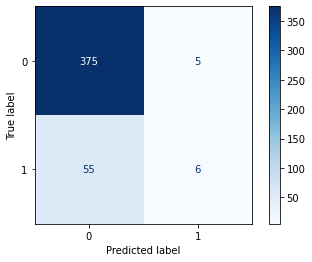

In [209]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

rfcl = RandomForestClassifier(n_estimators=200)
rfcl.fit(X_train, y_train)
random_pred = rfcl.predict(X_test)
rfcl.fit(X_train, y_train)

print("Accuracy:", metrics.accuracy_score(random_pred,y_test)*100)
print(metrics.classification_report(random_pred, y_test))
ConfusionMatrixDisplay.from_predictions(y_test, random_pred, cmap = 'Blues')

After tuning the data in tree based models they performed better with 200 trees(n_estimators)

Text(0, 0.5, 'TPR')

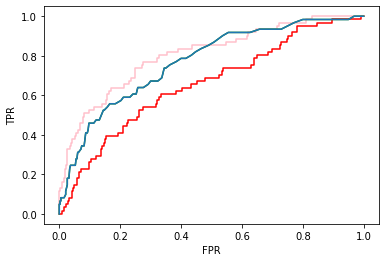

In [219]:
from sklearn.metrics import roc_curve

log_roc = log_reg_model.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test,log_roc)
plt.plot(fpr , tpr, color='red')

xgb_roc = xgb.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test,xgb_roc)
plt.plot(fpr , tpr, color='pink')

rfcl_roc = rfcl.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test,rfcl_roc)
plt.plot(fpr , tpr, color='green')

plt.plot(fpr, tpr)
plt.xlabel('FPR')
plt.ylabel('TPR')

By seeing the above ROC curves we can see the pink line which represents for XGBoost Model is more curved towards y-axis(True positive values) which means more data is covered so the accuracy is higher for that model compared to others which is 88% i.e highest among the three.